In [1]:
# Importing modules

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Reading and handling data

In [4]:
data = pd.read_csv("OneDrive/Documents/Machine Learning/Datasets/Iris.csv")

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
X = data.iloc[:,1:5]
X = np.asarray(X)


In [7]:
m,n = X.shape

In [8]:
# Applying PCA for easier data viz

In [9]:
def featureScaling(data):
    return (data-np.mean(data))/np.std(data)
X = featureScaling(X)

In [10]:
def PCA(data,K):
    m,n = data.shape
    U = np.zeros(n)
    S = np.zeros(n)
    Z = np.zeros((X.shape[0], K))
        
    sigma = (1/m) * data.T.dot(data)
    U,S,_ = np.linalg.svd(sigma)
    Z = X.dot(U[:,:K])
    
    return Z,U,S
K = 3
Z,U,S = PCA(X,K)

In [11]:
a = sum([S[i] for i in range(K)])
b = sum([S[i] for i in range(n)])
var = 1-a/b
print("Variation on choosing k = 3:",var*100)
print((1-var)*100,"percent variance retained")

Variation on choosing k = 3: 0.18440561424027946
99.81559438575972 percent variance retained


<IPython.core.display.Javascript object>


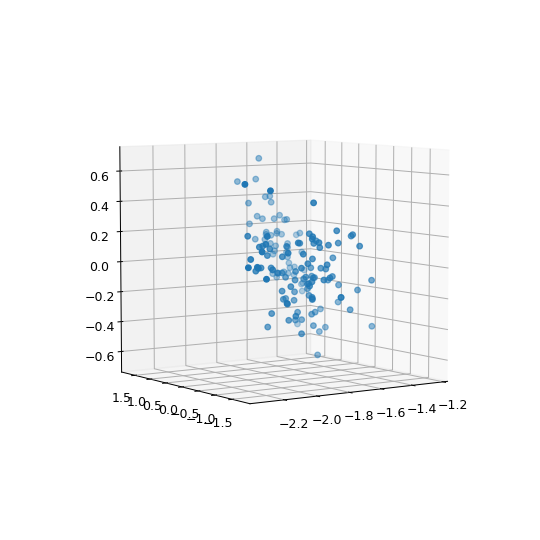

In [12]:
%matplotlib notebook
%matplotlib notebook
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Z[:,0], Z[:, 1], Z[:, 2], cmap='rainbow')

In [27]:
def recoverData(Z,U,K):
    X_app = Z.dot(U[:,:K].T)
    return X_app
X_app = recoverData(Z,U,K)

In [14]:
# K means Algorithm

In [15]:
def kMeansClusterInit(X,k):
    m,n = X.shape
    centroids = np.zeros((k, n))
    
    rand = np.random.permutation(m)
    centriods = X[rand[:k],:]
    return centriods

In [16]:
def closestCluster(X,centroids):
    m,n = X.shape
    k,_= centroids.shape
    index = np.zeros(m)
    for i in range(m):
        J = np.sqrt(np.sum(np.square(X[i]- centroids),axis = 1))
        index[i] = np.argmin(J)
        
    return index

In [17]:
def centroidsMean(X,index,k):
    m,n = X.shape
    centroids = np.zeros((k, n))

    for i in range(k):
        centroids[i] = np.mean(X[i == index],axis =0)

    return centroids

In [18]:
def kMeans(X,k,iterations):
    centroids = kMeansClusterInit(X,k)
    for i in range(iterations):
        index = closestCluster(X,centroids)
        centroids = centroidsMean(X,index,k)
    return centroids, index

In [19]:
# Applying K means on approx recovered data from PCA

In [20]:
i = 10
k = 3
centroids, ind = kMeans(X_app,k,i)

In [ ]:
# Plotting Formed Clusters

<IPython.core.display.Javascript object>


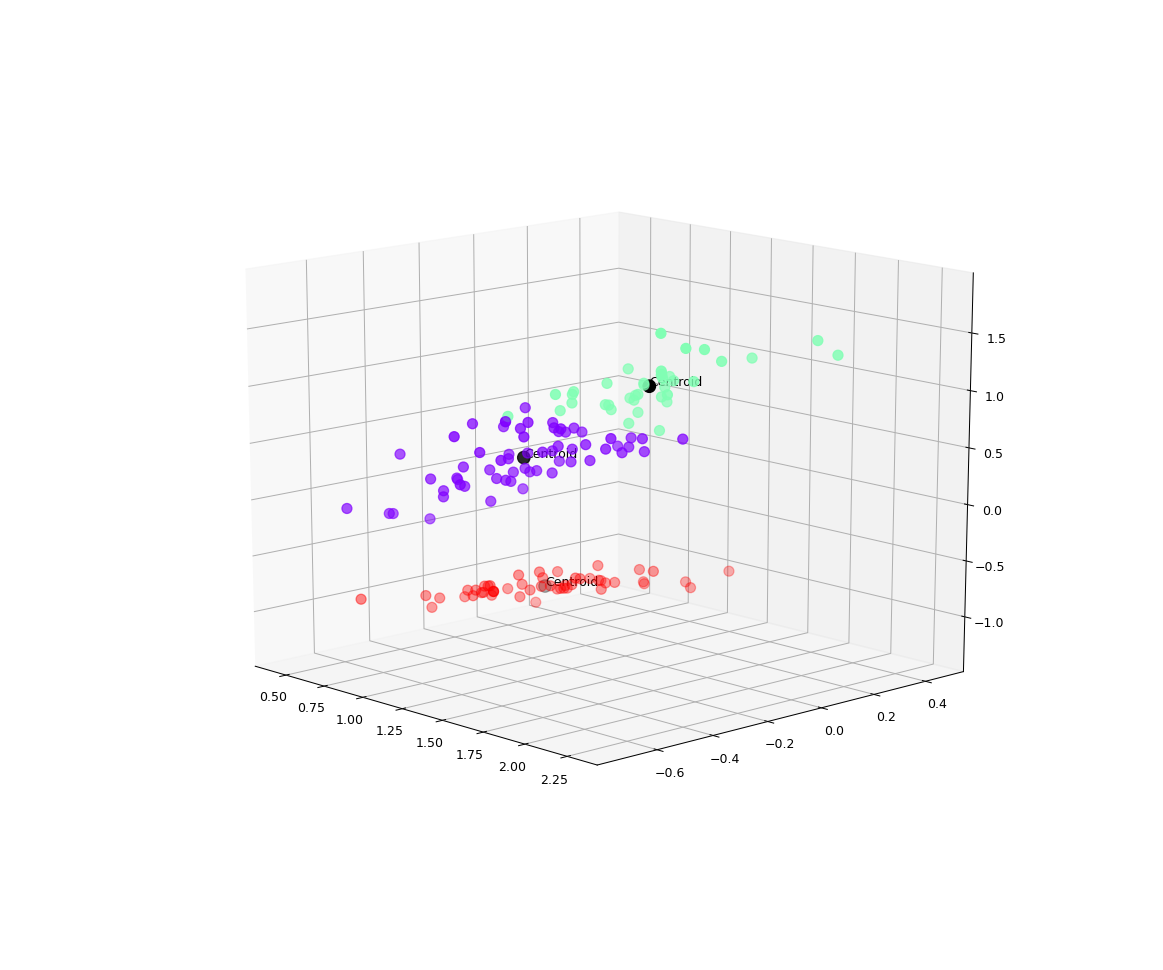

In [38]:

fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(111, projection='3d')

ax1.scatter(X_app[:, 0], X_app[:, 1], X_app[:, 2], cmap='rainbow', c=ind, s=8**2)
ax1.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], cmap='rainbow', c='black', s=100)
ax1.text(centroids[0, 0],centroids[0, 1],centroids[0, 2],s = "Centroid")
ax1.text(centroids[1, 0],centroids[1, 1],centroids[1, 2],s = "Centroid")
ax1.text(centroids[2, 0],centroids[2, 1],centroids[2, 2],s = "Centroid")
plt.show()